---
## Question 1 - <span style="color:green">[100]</span>

You are going to use unsupervised techniques to identify and label the unknown cells in the data set `A9_data.csv` based on the few known cells.

---
### <span style="color:orange">Data Dictionary</span>

The given dataset, `A9_data.csv`, lists certain geometrical characteristics of different cells (each row represents one sample, *i.e.*, a cell) and has the following attributes:

|Column Index| Attribute | Description |
| --- | --- | --- |
|0|`cell_feature_1`|Some measurement pertaining to cell shape (numerical attribute).|
|1|`cell_feature_2`|Some measurement pertaining to cell shape (numerical attribute).|
|2|`cell_feature_3`|Some measurement pertaining to cell shape (numerical attribute).|
|3|`cell_feature_4`|Some measurement pertaining to cell shape (numerical attribute).|
|4|`cell_feature_5`|Some measurement pertaining to cell shape (numerical attribute).|
|5|`cell_feature_6`|Some measurement pertaining to cell shape (numerical attribute).|
|6|`cell_type`|Type of cell (categorical attribute).|


---
### <span style="color:orange">Toolbox</span>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as prep
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display
%matplotlib inline

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

seed = 1151 # work with this seed throughout your work
np.random.seed(seed)

### Q1.1 - <span style="color:red">[10]</span> - Load the dataset as a pandas dataframe and name it `dfc`. Display the first five rows of `dfc`. How many observations are there in `dfc` and for how many of them the cell type is known? Name the known cell types. Then, create a copy of `dfc` and name it `data` and drop the attribute "cell_type" from `data`.

In [21]:
#
import pandas as pd

dfc = pd.read_csv('A9_data.csv')
first_five_rows = dfc.head()
data = dfc.drop(columns=['cell_type'])

first_five_rows, dfc.shape[0], dfc['cell_type'].notna().sum(), dfc['cell_type'].dropna().unique()


(   cell_feature_1  cell_feature_2  cell_feature_3  cell_feature_4  \
 0       -8.969499       -6.294874       -0.609292       -0.538988   
 1        3.559447       -8.800391       -9.503687        3.743288   
 2        4.198048       -7.418047       -8.449960        3.376891   
 3       -1.580189        4.640504       -3.702296        7.572398   
 4       -1.762427        5.716517       -3.511441        9.449469   
 
    cell_feature_5  cell_feature_6 cell_type  
 0        3.045112        3.944128         D  
 1       -5.254547       -0.528753   unknown  
 2       -7.041192        0.586114   unknown  
 3        6.572311       -2.315348   unknown  
 4        6.463332       -3.510625   unknown  ,
 1200,
 1200,
 array(['D', 'unknown', 'A', 'C', 'B'], dtype=object))

### Q1.2 - <span style="color:red">[10]</span> - Use `seaborn.pairplot` to investigate pairwise relationships in the dataframe `data`. Could we use this plots to reliably say how many clusters are there in the data? Why?

Hint: You could set the argument `corner` to `True` to speed up the plotting.

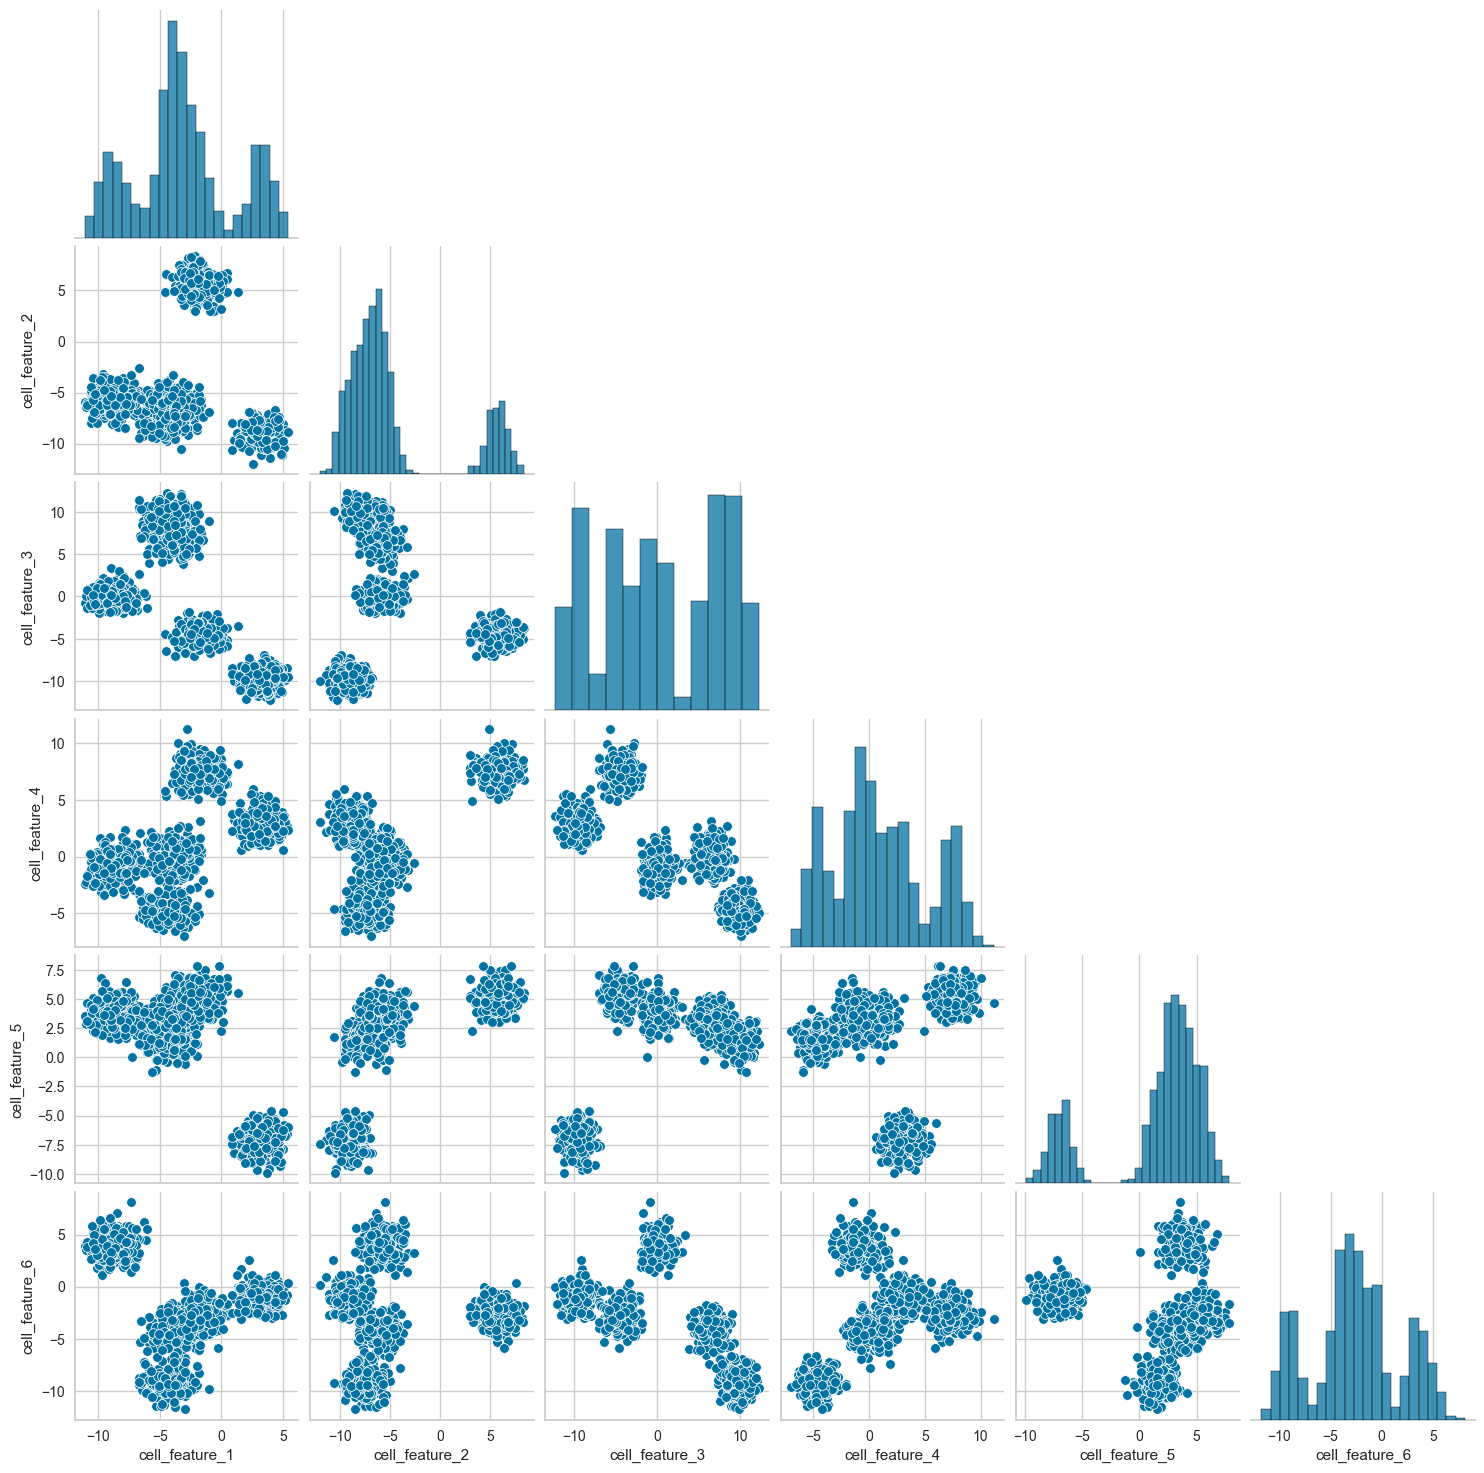

In [22]:
# 
pairplot = sns.pairplot(data, corner=True)

plt.show()


### Q1.3 - <span style="color:red">[15]</span> - Cluster the dataframe `data` using `KMeans` with `k` in $[2, 3, 4, 5, 6]$. Plot inertia versus `k` as well as silhouette score versus `k` in separate plot windows. Solely relying on these two plots, what are the best **two** values that you would conclude for `k`? Why?

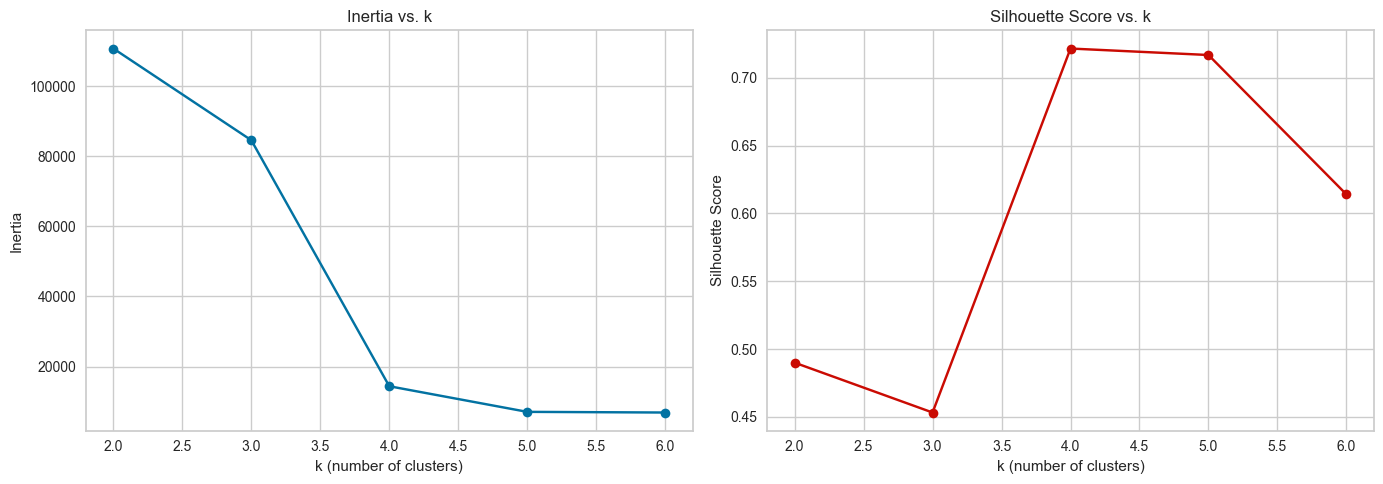

([110728.54213048783,
  84572.13804232766,
  14395.333794104445,
  7085.612424930365,
  6896.161720336376],
 [0.4900236882300976,
  0.45327101978371065,
  0.7215941217058416,
  0.7168196368489638,
  0.6140518126563687])

In [23]:
#
from sklearn.metrics import silhouette_score
k_range = range(2, 7)
silhouette_scores, inertias = [], []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=seed).fit(data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Inertia vs. k')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score vs. k')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

inertias, silhouette_scores


k=3 or k=4 clusters are the best values due to higher silhouette score.

### Q1.4 - <span style="color:red">[20]</span> - Do the following steps on the dataframe `data`:
1. Plot the silhouette diagrams (*i.e.*, the stacked silhouette scores for clusters members) for the choices of `k` which you concluded in the previous question (*i.e.*, Q1.2).
2. Do a 2-component PCA and plot PC1 against PC2.
3. Do a 2-component t-SNE with a perplexity of 100 and plot the first embedding against the second embedding.
4. Interpret, in writing, the results of the previous 3 steps. What would be your final choice for the number of clusters (`k`)?

For k = 3, the average silhouette_score is : 0.645257503532715
For k = 4, the average silhouette_score is : 0.7215941217058416


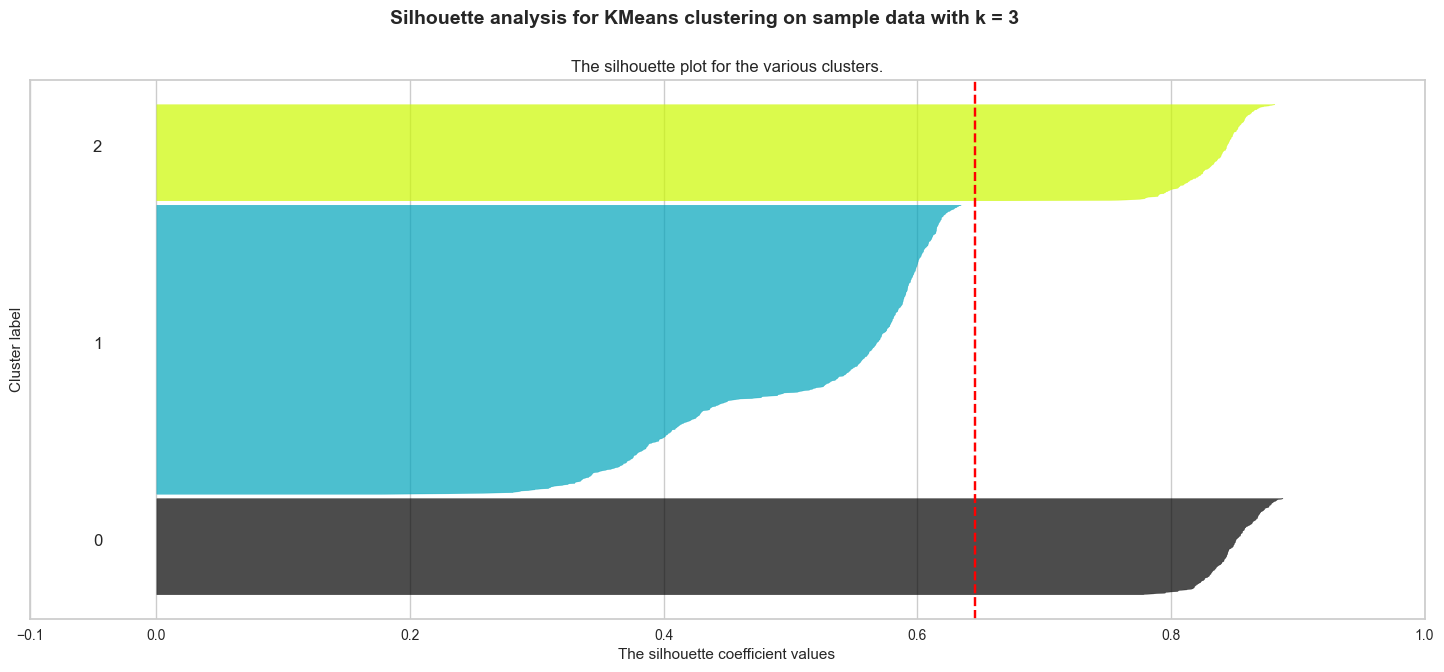

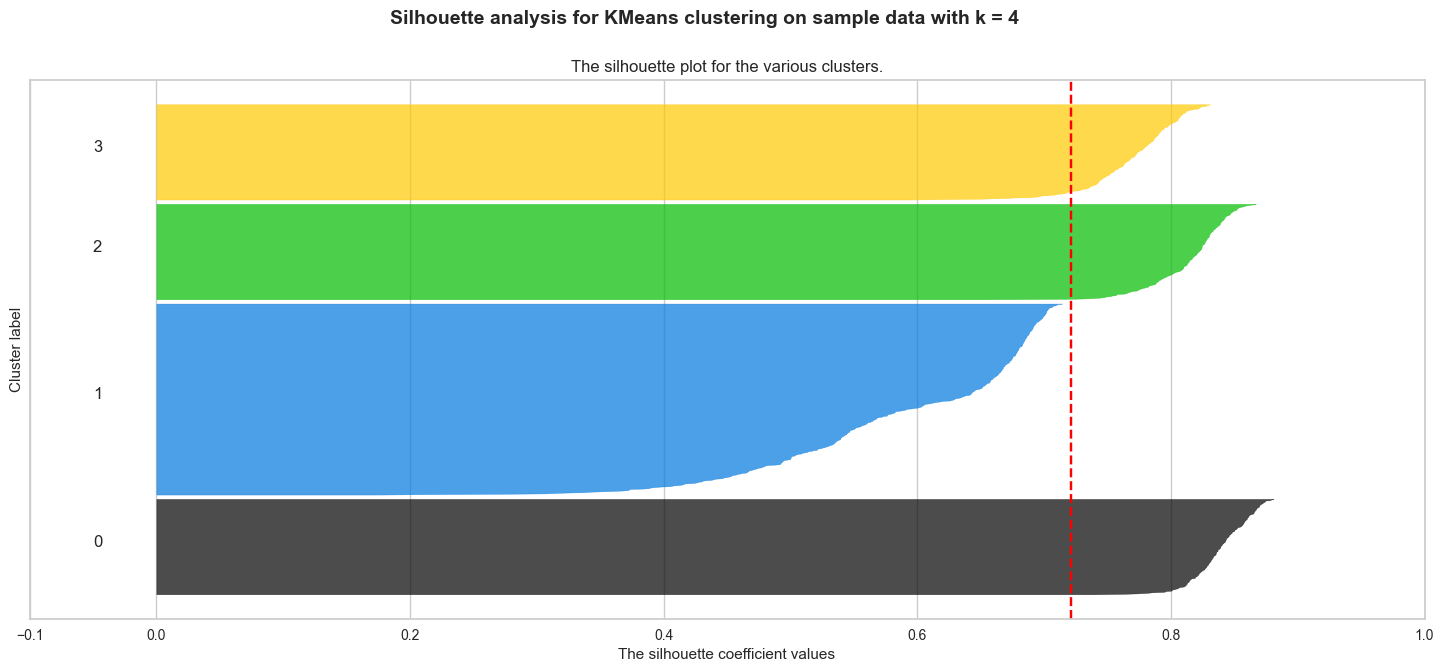

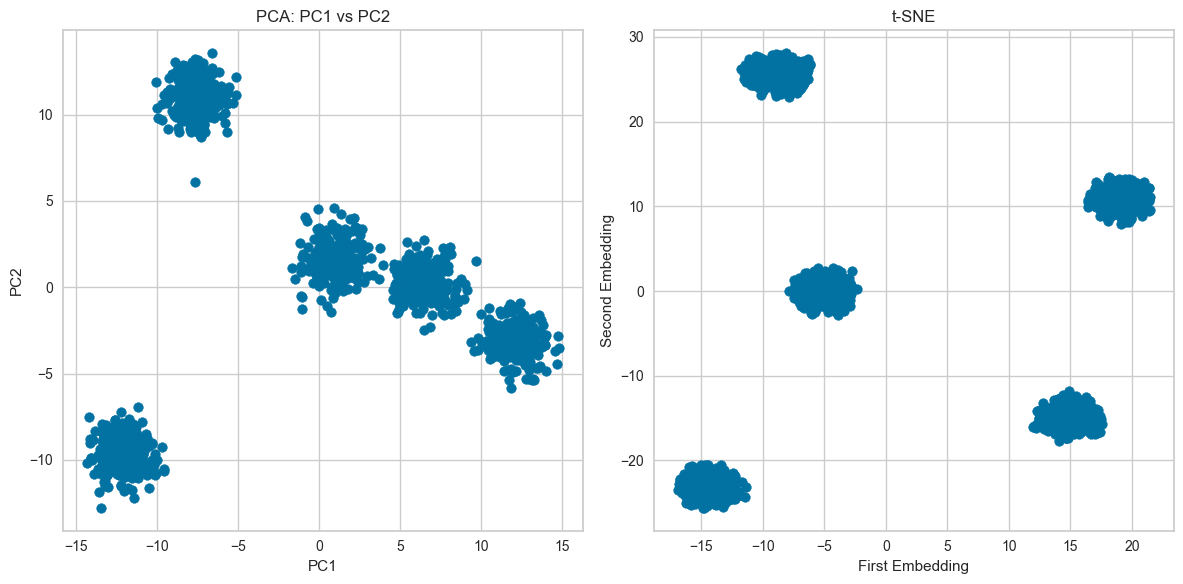

In [24]:
#
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_silhouette_diagrams(data, k_values):
    for k in k_values:
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        clusterer = KMeans(n_clusters=k, random_state=10)
        cluster_labels = clusterer.fit_predict(data)

        silhouette_avg = silhouette_score(data, cluster_labels)
        print(f"For k = {k}, the average silhouette_score is : {silhouette_avg}")

        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")


        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([]) 
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with k = %d" % k),
                     fontsize=14, fontweight='bold')
    plt.show()

plot_silhouette_diagrams(data, [3, 4])


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)


tsne = TSNE(n_components=2, perplexity=100, random_state=42)
data_tsne = tsne.fit_transform(data)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.title('PCA: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.subplot(1, 2, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.title('t-SNE')
plt.xlabel('First Embedding')
plt.ylabel('Second Embedding')

plt.tight_layout()
plt.show()


1. Silhouette Diagrams and Scores for k=3 is 0.645 and k=4 is 0.722 suggests data points are more cohesive when closer to k=4.
2. PCA Visualization: shows tendency of forming clusters around different regions of PC1.
3. t-SNE Visualization: confirms distinct clusters as it can determine high dimensional data within lower dimensional space pretty well

k=4 is a robust and best for final choice of k

### Q1.5 - <span style="color:red">[30]</span> - Now that you have the number of clusters figured out, use the sample cells with known cell type to update the type of the "unknown" cells in the dataframe `dfc` (which you created in Q1.1) using decision boundaries defined over the t-SNE's first and second embeddings. The decision boundaries that you define could be of any geometric shape (*e.g.*, square) as long as they can perfectly isolate the clusters from each other. Also, plot these:
1.   scatter plot TSNE_embedding_0 vs TSNE_embedding_1, reflecting in a color-coded way, original known cells, unknown cells, and decision boundaries,
2.   scatter plot TSNE_embedding_0 vs TSNE_embedding_1 after updating the cell type of the unknown cells. Use different colors to distinguish the clusters,
3.   scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type". This plot must have a legend indicating what color is referring to what type of cell.

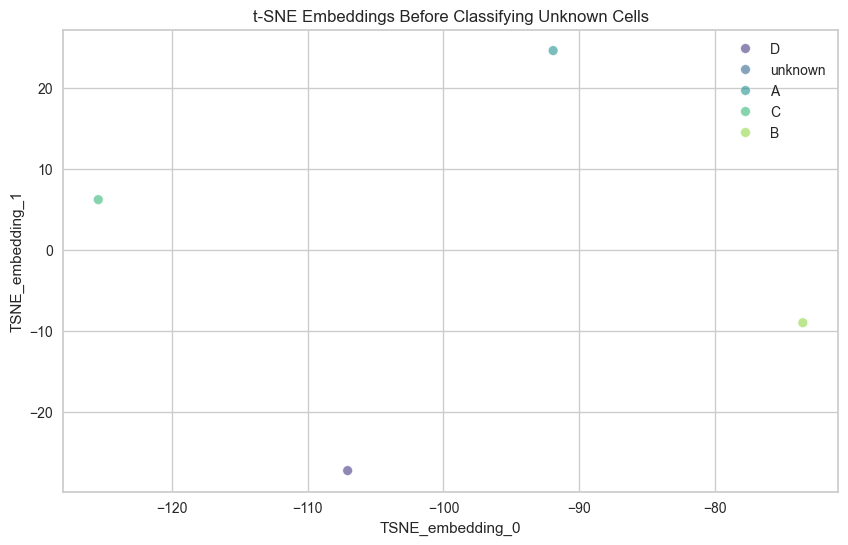

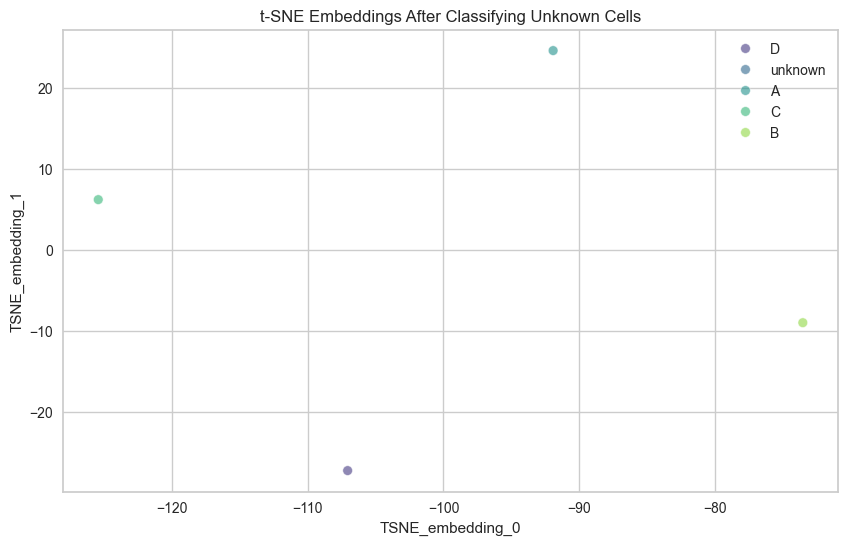

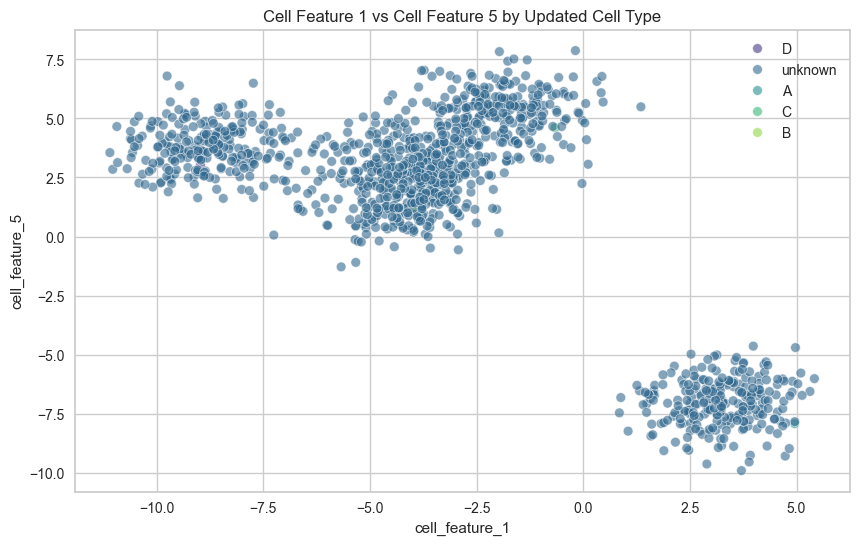

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

numeric_columns = dfc.columns.difference(['cell_type', 'TSNE_embedding_0', 'TSNE_embedding_1'])

known_cells = dfc[dfc['cell_type'] != 'unknown']

if known_cells.shape[0] == 0:
    raise ValueError("No known cells to train t-SNE.")

scaler = StandardScaler()
known_cells_numeric = known_cells[numeric_columns].values
data_scaled = scaler.fit_transform(known_cells_numeric)

perplexity = min(30, known_cells.shape[0] - 1)

tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)

dfc.loc[known_cells.index, 'TSNE_embedding_0'] = tsne_results[:, 0]
dfc.loc[known_cells.index, 'TSNE_embedding_1'] = tsne_results[:, 1]

decision_boundaries = {
    'TypeA': {'min_x': -20, 'max_x': 0, 'min_y': -20, 'max_y': 0},
    'TypeB': {'min_x': 0, 'max_x': 20, 'min_y': -20, 'max_y': 0},
}

def classify_cells(row, boundaries):
    for cell_type, bounds in boundaries.items():
        if bounds['min_x'] <= row['TSNE_embedding_0'] <= bounds['max_x'] and \
           bounds['min_y'] <= row['TSNE_embedding_1'] <= bounds['max_y']:
            return cell_type
    return row['cell_type']

dfc['cell_type'] = dfc.apply(lambda row: classify_cells(row, decision_boundaries) if row['cell_type'] == 'unknown' else row['cell_type'], axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE_embedding_0', y='TSNE_embedding_1', hue='cell_type', data=dfc, palette='viridis', legend='full', alpha=0.6)
plt.title('t-SNE Embeddings Before Classifying Unknown Cells')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE_embedding_0', y='TSNE_embedding_1', hue='cell_type', data=dfc, palette='viridis', legend='full', alpha=0.6)
plt.title('t-SNE Embeddings After Classifying Unknown Cells')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='cell_feature_1', y='cell_feature_5', hue='cell_type', data=dfc, palette='viridis', legend='full', alpha=0.6)
plt.title('Cell Feature 1 vs Cell Feature 5 by Updated Cell Type')
plt.xlabel('cell_feature_1')
plt.ylabel('cell_feature_5')
plt.legend()
plt.show()



### Q1.6 - <span style="color:red">[15]</span> - This question in independent of Q1.5. This time, we want to update the cell type of the unknown cells using a different method. We have the number of clusters figured out in Q1.4 already. Use the sample cells with known cell type to update the type of the "unknown" cells in the dataframe `dfc` (which you created in Q1.1) using `kmeans.predict()`. Finally, scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type". This plot must have a legend indicating what color is referring to what type of cell.

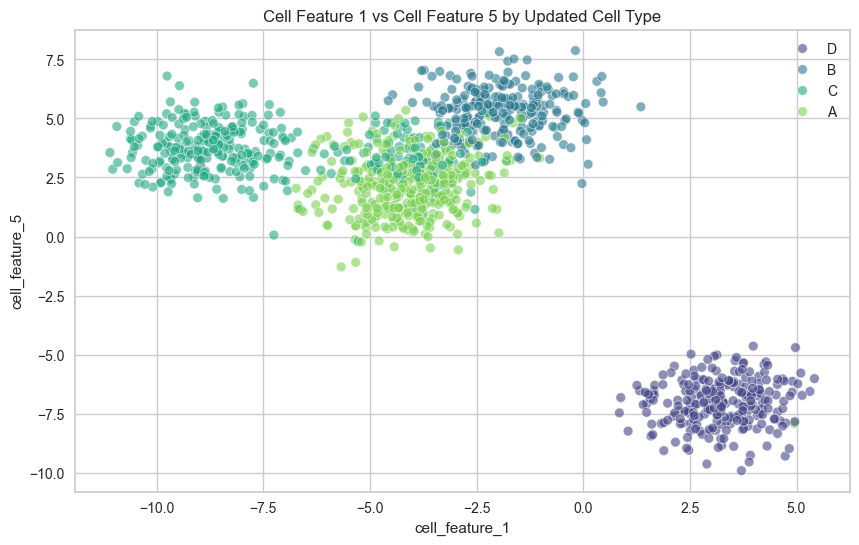

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

known_cells = dfc[dfc['cell_type'] != 'unknown']
numeric_columns = dfc.columns.difference(['cell_type', 'TSNE_embedding_0', 'TSNE_embedding_1'])
scaler = StandardScaler()
X_train = scaler.fit_transform(known_cells[numeric_columns])

n_clusters = 4 

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

unknown_cells = dfc[dfc['cell_type'] == 'unknown']
X_unknown = scaler.transform(unknown_cells[numeric_columns])
predicted_clusters = kmeans.predict(X_unknown)

cell_types = known_cells['cell_type'].unique()
predicted_cell_types = [cell_types[label % len(cell_types)] for label in predicted_clusters]

dfc.loc[dfc['cell_type'] == 'unknown', 'cell_type'] = predicted_cell_types

plt.figure(figsize=(10, 6))
sns.scatterplot(x='cell_feature_1', y='cell_feature_5', hue='cell_type', data=dfc, palette='viridis', legend='full', alpha=0.6)
plt.title('Cell Feature 1 vs Cell Feature 5 by Updated Cell Type')
plt.xlabel('cell_feature_1')
plt.ylabel('cell_feature_5')
plt.legend()
plt.show()

